## Please, fill in before you start:

First Name: Majid

Last Name: Sohrabi

Group: ISSA (Data Science)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 bonus points for a well organized and easy to read plot + 1 bonus point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [7]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

100%|██████████| 100/100 [00:00<00:00, 1067.84it/s]


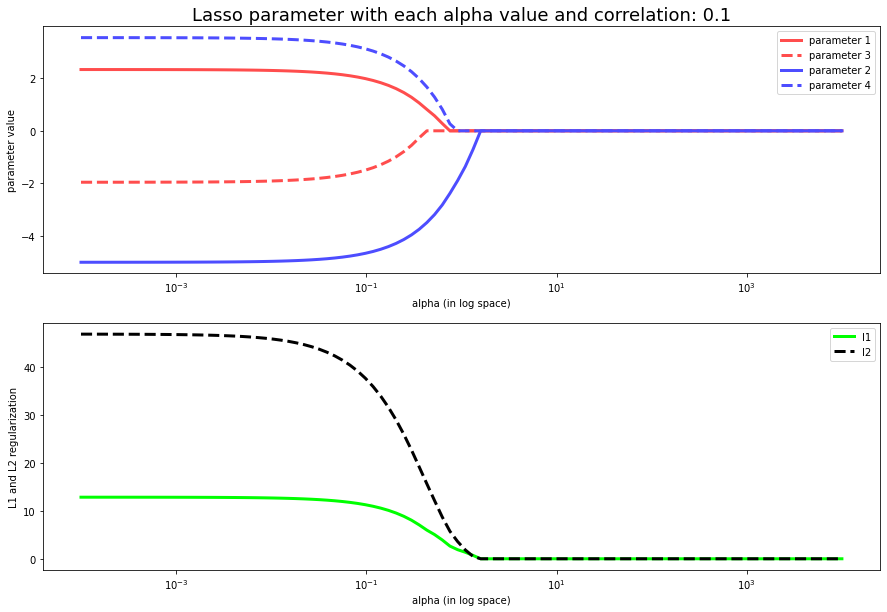

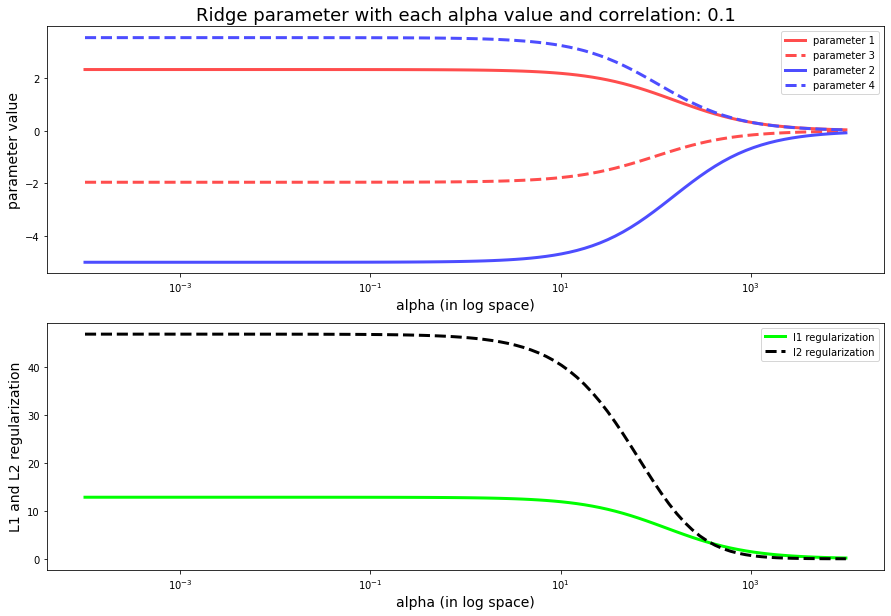

100%|██████████| 100/100 [00:00<00:00, 953.58it/s]


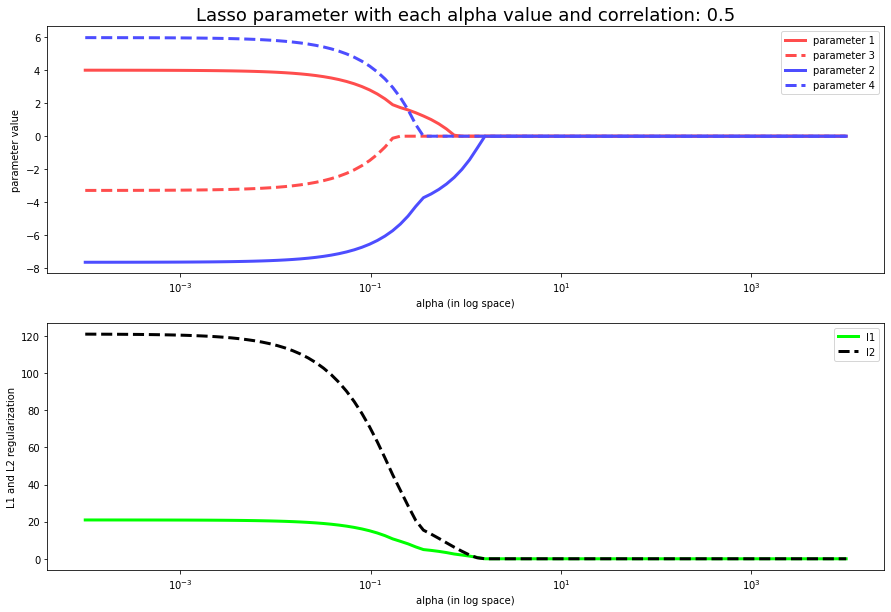

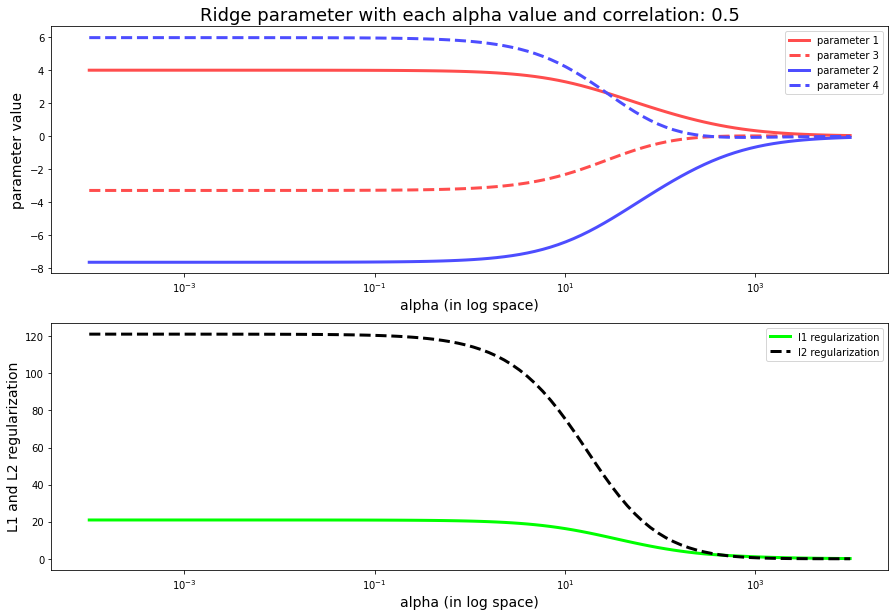

100%|██████████| 100/100 [00:00<00:00, 727.57it/s]


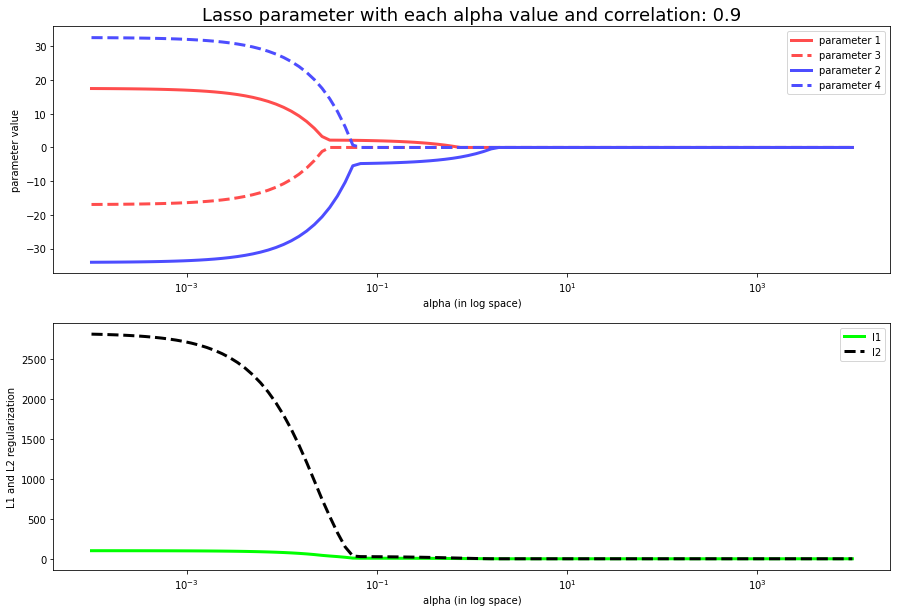

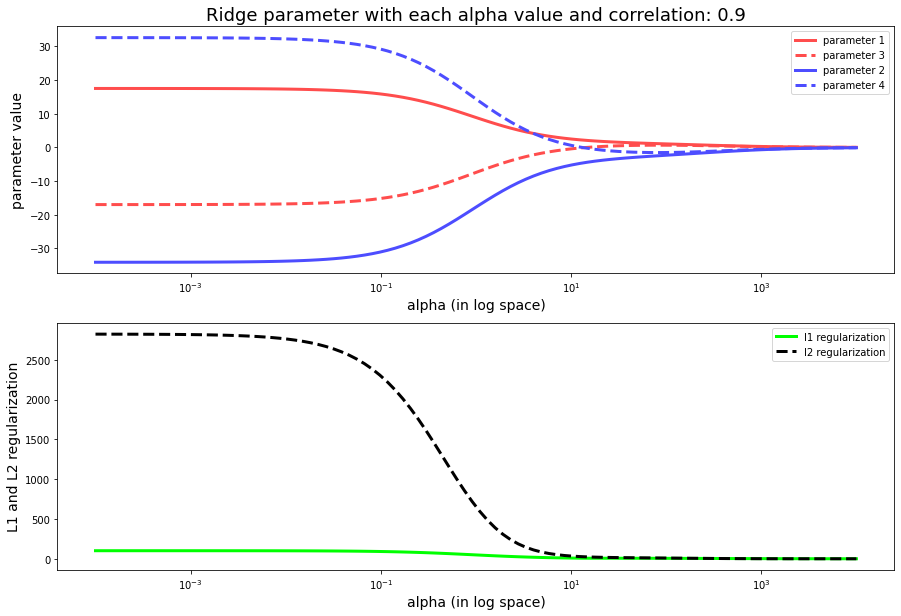

In [38]:
from tqdm import tqdm

for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)

  # regularization powers:
  alpha_values = np.logspace(-4, 4, 100, base=10)

  # lists to collect models' parameters:
  params_ridge = []
  params_lasso = []

  for alpha in tqdm(alpha_values):
    # for ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    params_ridge.append(ridge.coef_)    
    # for lasso
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    params_lasso.append(lasso.coef_)

  # Visualization
  plt.style.use('tableau-colorblind10')  # 'Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10'
  linewidth = 3
  rcolor = [1,0.3,0.3]
  bcolor = [0.3,0.3,1]
  fig = plt.figure(figsize=(15,10))

  # Lasso plt
  plt.subplot(211)
  plt.gca().set_xscale('log')
  plt.plot(alpha_values[:], np.array(params_lasso)[:,0], color=rcolor, label='0',linewidth=linewidth)
  plt.plot(alpha_values[:], np.array(params_lasso)[:,2], '--', color=rcolor, label='2',linewidth=linewidth)
  plt.plot(alpha_values[:], np.array(params_lasso)[:,1], color=bcolor, label='1',linewidth=linewidth)
  plt.plot(alpha_values[:], np.array(params_lasso)[:,3], '--', color=bcolor, label='3',linewidth=linewidth)
  plt.xlabel("alpha (in log space)", fontsize = 10)
  plt.ylabel("parameter value", fontsize = 10)
  plt.title(f"Lasso parameter with each alpha value and correlation: {correlation}", fontsize = 18)
  plt.legend(['parameter 1', 'parameter 3', 'parameter 2', 'parameter 4'],fontsize='medium')#{'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}

  # L1 and L2 plot
  plt.subplot(212)    
  l1 = abs(np.array(params_lasso)).sum(axis=1)
  l2 = (np.array(params_lasso)**2).sum(axis=1)
  plt.plot(alpha_values, l1, color=[0,1,0], label='0',linewidth=linewidth)
  plt.plot(alpha_values, l2, '--', color=[0,0,0], label='2',linewidth=linewidth)
  plt.xlabel("alpha (in log space)", fontsize = 10)
  plt.ylabel("L1 and L2 regularization", fontsize = 10)
  plt.gca().set_xscale('log')
  plt.legend(['l1', 'l2'],fontsize='medium')#{'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  plt.show()
  
  # Ridge plt
  plt.figure(figsize=(15,10))
  plt.subplot(211)    
  plt.gca().set_xscale('log')
  plt.plot(alpha_values[:], np.array(params_ridge)[:,0], color=rcolor, label='0',linewidth=linewidth)
  plt.plot(alpha_values[:], np.array(params_ridge)[:,2], '--', color=rcolor, label='2',linewidth=linewidth)
  plt.plot(alpha_values[:], np.array(params_ridge)[:,1], color=bcolor, label='1',linewidth=linewidth)
  plt.plot(alpha_values[:], np.array(params_ridge)[:,3], '--', color=bcolor, label='3',linewidth=linewidth)
  plt.xlabel("alpha (in log space)", fontsize = 14)
  plt.ylabel("parameter value", fontsize = 14)
  plt.title(f"Ridge parameter with each alpha value and correlation: {correlation}", fontsize = 18)
  plt.legend(['parameter 1', 'parameter 3', 'parameter 2', 'parameter 4'],fontsize='medium')#{'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}

  # L1 and L2 plt
  plt.subplot(212)    
  l1 = abs(np.array(params_ridge)).sum(axis=1)
  l2 = (np.array(params_ridge)**2).sum(axis=1)
  plt.plot(alpha_values, l1, color=[0,1,0], label='0', linewidth=linewidth)
  plt.plot(alpha_values, l2, '--', color=[0,0,0], label='2', linewidth=linewidth)
  plt.gca().set_xscale('log')
  plt.xlabel("alpha (in log space)", fontsize = 14)
  plt.ylabel("L1 and L2 regularization", fontsize = 14)
  plt.legend(['l1 regularization', 'l2 regularization'],fontsize='medium')#{'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  plt.show()
  print('\n')

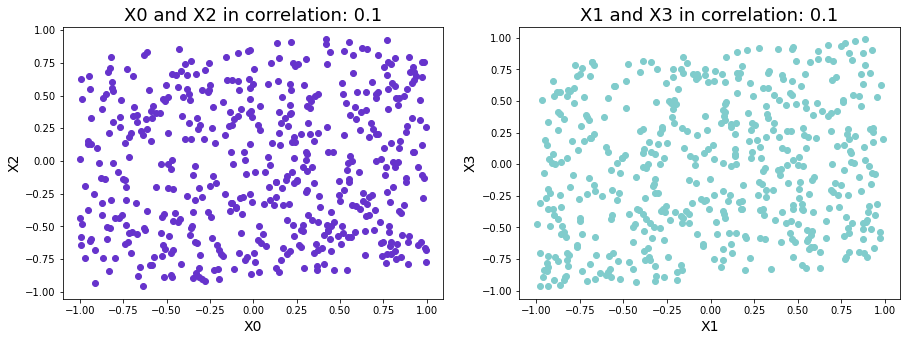

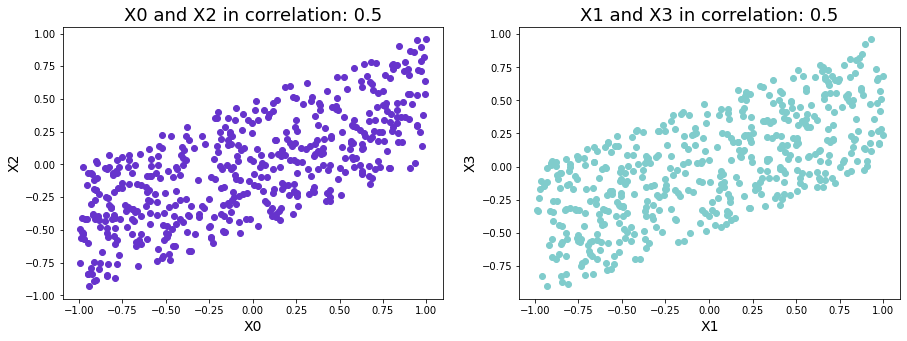

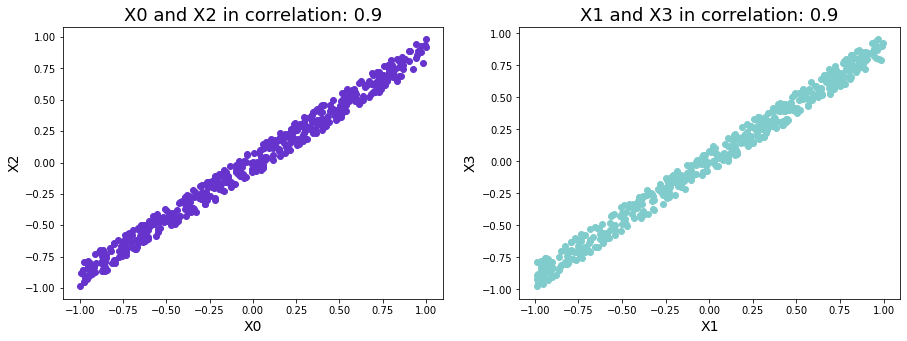

In [31]:
# check the fetures for each correlation value
for correlation in [0.1, 0.5, 0.9]:

  X, y = gen_data(500, correlation)

  # visualization
  plt.style.use('tableau-colorblind10')  # 'Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10'
  plt.figure(figsize=(15, 5))

  plt.subplot(1,2,1)
  plt.scatter(X[:,0],X[:,2] , label='data', color = [0.4, 0.2, 0.8])
  plt.title(f"X0 and X2 in correlation: {correlation}", fontsize = 18)
  plt.xlabel('X0', fontsize = 14)
  plt.ylabel('X2', fontsize = 14)

  plt.subplot(1,2,2)
  plt.scatter(X[:,1],X[:,3] , label='data', color=[0.5, 0.8, 0.8])
  plt.title(f"X1 and X3 in correlation: {correlation}", fontsize = 18)
  plt.xlabel('X1', fontsize = 14)
  plt.ylabel('X3', fontsize = 14)

# Comments

In this task, we have 3 different correlations and the alpha from 10^4 to 10^-4. The alpha is the coefficient of the impact rate of regularization loss (l1 and l2).
When we have greater alpha the impact of the regularization is more and it tries to reduce the weights. 

* l1: tries to reduce the sum of the absolute value of the weights (in Lasso)

* l2: tries to reduce the sum of the squared values of the weights (in Ridge).

By looking at the plots we observe that when we have l1, all weights decrease gradually, but when we have l2 both the variance of the weights and the weights themselves decrease gradually. Furthermore, by increasing the correlation value our parameters of Ridge and Lasso converge faster.

We also plotted the l1 and l2 after each plot. At the end, we plotted the data for each correlation level (by considering the related features).